In [2]:
from model.VAE import VAE

from loaders.load_model import load_model
from loaders.load_mnist import load_mnist

import numpy as np
import matplotlib.pyplot as plt


2023-05-08 14:23:35.112850: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist()

In [4]:
vae = load_model(VAE, "./save")

2023-05-08 14:23:51.300108: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 127ms/step


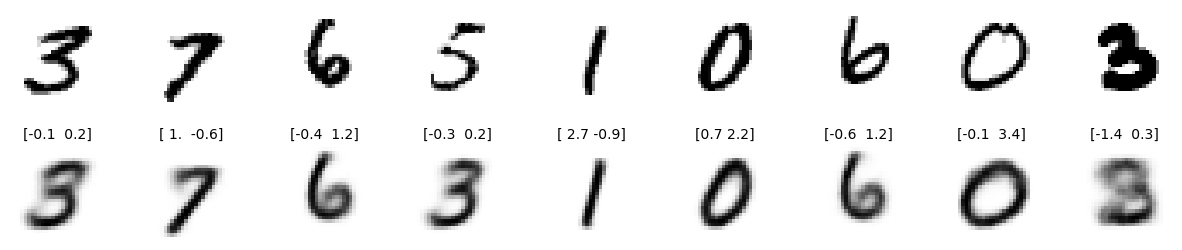

In [5]:
n_to_show = 9
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')

313/313 [==============================] - 2s 6ms/step


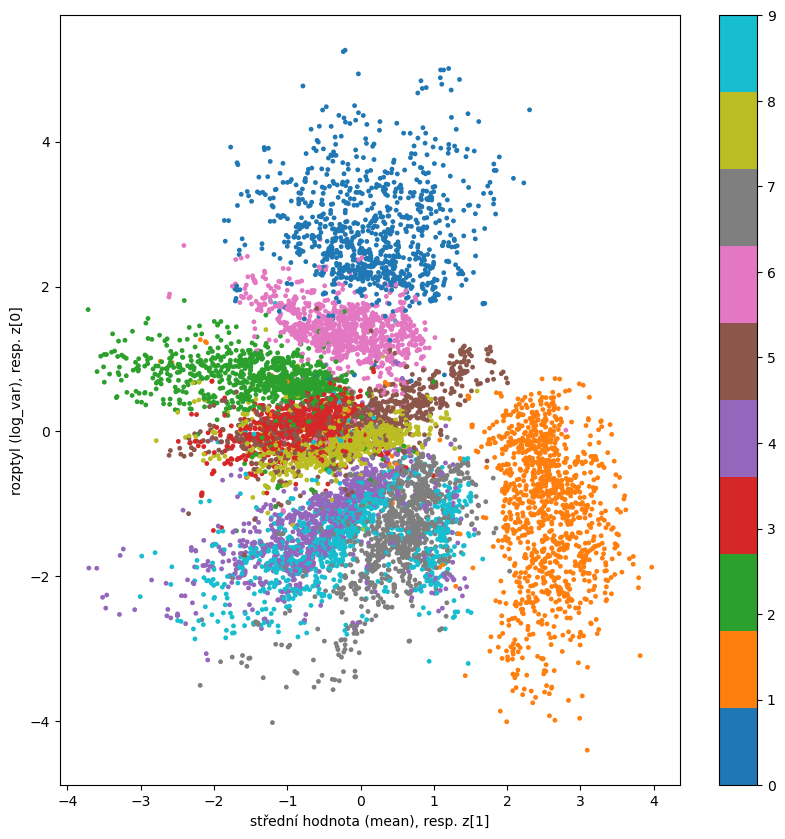

In [7]:
# Based on Murphy 2022 book
n_samples = 10000

random_samples_normal_distribution = np.random.choice(range(len(x_test)), n_samples)
example_images = x_test[random_samples_normal_distribution]
example_labels = y_test[random_samples_normal_distribution]

z_points = vae.encoder.predict(example_images)

plt.figure(figsize=(10, 10))
plt.scatter(x=z_points[:, 0], y=z_points[:, 1], c= example_labels, cmap="tab10", s=6)
plt.colorbar()
plt.xlabel("střední hodnota (mean), resp. z[1]")
plt.ylabel("rozptyl (log_var), resp. z[0]")

plt.show()

1/1 [==============================] - 0s 18ms/step


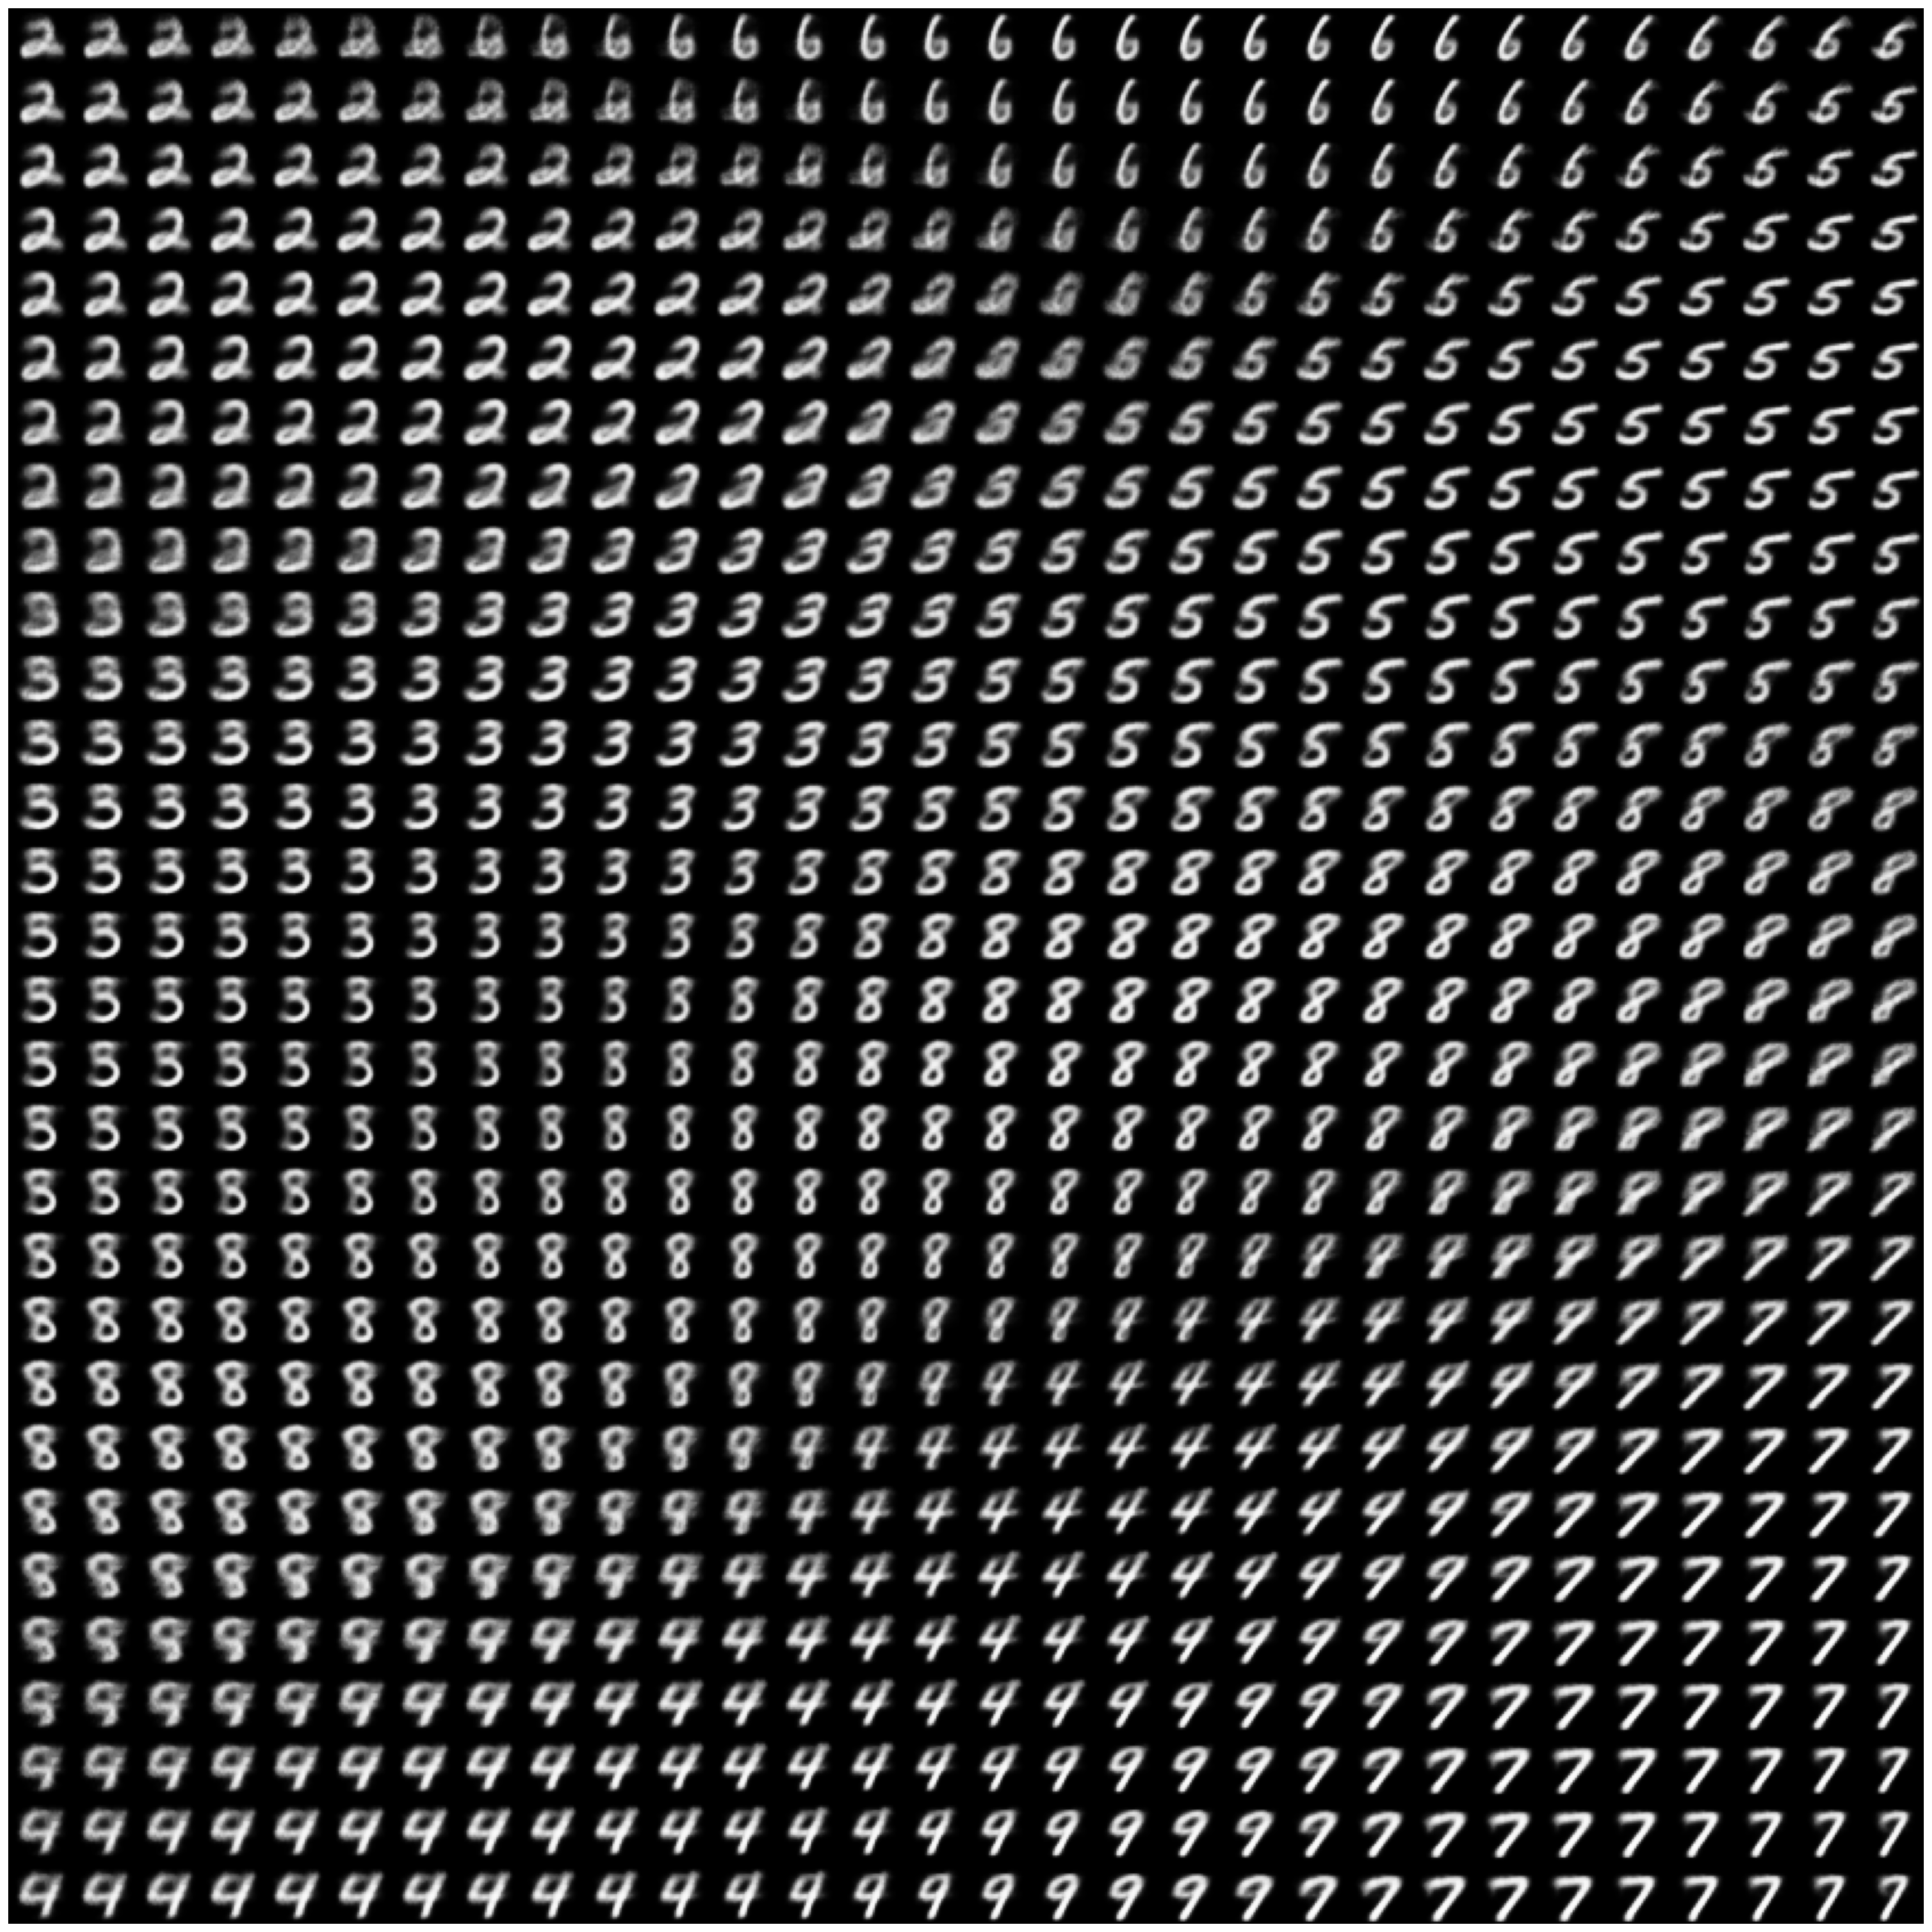

In [8]:
# Based on Chellot 2017 book
# Sampling a grid of images from the 2D latent space

n = 30  # 30 x 30 images
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# Sample points linearly on a 2D grid
grid_x = np.linspace(-1, 1, n)
grid_y = np.linspace(-1, 1, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        # for each location, sample a digit and add it to figure
        z_sample = np.array([[xi, yi]])
        x_decoded = vae.decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size, j *
               digit_size: (j + 1) * digit_size] = digit
        

# Plotting the 2D manifold
plt.figure(figsize=(30, 30))
start_range = digit_size // 2
end_range = n * digit_size + start_range
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.axis("off")
plt.imshow(figure, cmap="Greys_r")